# **Pertemuan 07: Clustering (K-Means & Hierarchical)**

|  Nama | NIM |
| :--- | :--- |
| Muhammad Zaky Farhan | 105841110523 |

**Tujuan Praktikum:**

Praktikum pertemuan ketujuh ini membahas tentang proses pengelompokan data atau biasa disebut *clustering*. Proses ini termasuk dalam jenis pembelajaran mesin yang mencari pola kemiripan pada sekumpulan data yang belum memiliki label kelompok. Fokus utamanya ada pada dua algoritma, yaitu K-Means yang bekerja dengan cara mencari titik tengah untuk setiap kelompok, dan Hierarchical Clustering yang menyatukan data berdekatan tahap demi tahap sampai membentuk kelompok besar.  Praktikum ini juga membahas cara menilai bagus tidaknya hasil pengelompokan menggunakan hitungan angka Inertia dan Silhouette Score, serta cara mencari jumlah kelompok yang paling pas menggunakan Metode Elbow.

Pengelompokan data atau biasa disebut *clustering* merupakan bagian dari pembelajaran mesin yang bekerja tanpa pengawasan. Proses ini bertugas mengumpulkan baris data yang memiliki kemiripan sifat ke dalam beberapa wadah, tanpa perlu diberi label atau kunci jawaban terlebih dahulu. Salah satu cara yang paling sering dipakai adalah algoritma K-Means. Algoritma ini mewajibkan penentuan jumlah kelompok yang ditandai dengan huruf K di awal sebelum mesin mulai berhitung mencari titik tengahnya.

Selain K-Means, algoritma Hierarchical Clustering juga sering dipakai. Cara kerjanya sedikit berbeda karena mesin ini menyatukan titik-titik data yang berdekatan secara bertingkat, mulai dari kelompok kecil hingga perlahan menyatu menjadi kelompok yang sangat besar. Proses penyatuan bertingkat ini biasanya digambar menjadi sebuah bagan berbentuk ranting pohon yang dinamakan dendrogram.  Lewat gambar dendrogram inilah letak garis potong bisa ditarik secara mendatar untuk menentukan jumlah kelompok akhir yang diinginkan.

Untuk memastikan apakah hasil pengelompokannya sudah bagus atau belum, dua alat ukur matematis biasa digunakan. Alat ukur pertama bernama *inertia*, yang dihitung untuk melihat seberapa padat jarak berkumpulnya titik data di dalam satu kelompok. Alat ukur kedua bernama *silhouette score*, yang dipakai untuk menilai seberapa renggang jarak batas pemisah antara satu kelompok dengan kelompok yang ada di sebelahnya.  Kedua angka hitungan inilah yang selalu menjadi patokan pasti untuk menentukan berapa jumlah kelompok yang paling pas saat membelah sebuah kumpulan data.

## Penjelasan Kode Ringkas

Penulisan kode dimulai dengan mendatangkan beberapa alat ukur dan mesin pengolah dari pustaka scikit-learn. Fungsi `make_blobs` dipanggil untuk membuat data angka sembarang yang dari awal sudah memiliki pola mengelompok. Mesin pengelompokannya menggunakan kelas `KMeans` dan `AgglomerativeClustering`. Untuk menilai hasilnya, fungsi `silhouette_score` ikut dipanggil; fungsi ini bertugas menghitung apakah posisi sebuah data sudah pas berada di dalam kelompoknya jika dibandingkan dengan kelompok di sebelahnya.

Data buatan ini diciptakan lewat pemanggilan perintah `make_blobs`. Aturan `n_samples=300` dipasang untuk membuat 300 titik data, dan `centers=4` dipasang agar titik-titik tersebut menyebar di empat lokasi yang berbeda. Setelah datanya siap, mesin `KMeans` diatur dengan `n_clusters=4` supaya mesin membagi data menjadi empat kelompok. Perintah `.fit_predict()` lalu dijalankan agar mesin memproses datanya dan langsung menempelkan nomor kelompok pada setiap baris data. Angka kerapatan kelompok diambil lewat pemanggilan `kmeans.inertia_`. Di sisi lain, mesin `AgglomerativeClustering` juga diatur untuk mencari empat kelompok dan disuruh memproses data yang sama. Skor kualitas pemisahannya kemudian dihitung memakai `silhouette_score` untuk kedua mesin, dibulatkan angkanya menggunakan perintah `round`, lalu dicetak ke layar untuk dibandingkan bersisian.


In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Pembuatan data sintetis dengan 300 sampel dan 4 pusat data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Penerapan K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels_k = kmeans.fit_predict(X)

print("Hasil Evaluasi K-Means")
print("Inertia:", round(kmeans.inertia_, 2))
print("Silhouette Score:", round(silhouette_score(X, labels_k), 3))

# Penerapan Hierarchical Clustering
agg = AgglomerativeClustering(n_clusters=4)
labels_h = agg.fit_predict(X)

print("\nHasil Evaluasi Hierarchical")
print("Silhouette Score:", round(silhouette_score(X, labels_h), 3))

Hasil Evaluasi K-Means
Inertia: 564.91
Silhouette Score: 0.792

Hasil Evaluasi Hierarchical
Silhouette Score: 0.792


Angka yang tampil di layar memperlihatkan nilai Inertia untuk K-Means. Angka ini adalah hasil hitungan total jarak dari semua titik data menuju ke titik tengah kelompoknya masing-masing. Angka ini dipakai untuk melihat seberapa padat titik-titik tersebut mengumpul. Lalu, nilai Silhouette Score didapat oleh kedua algoritma dengan angka di kisaran 0.79. Angka yang mendekati nilai 1 ini mempunyai arti bahwa batas antar kelompok sudah sangat renggang dan terlihat jelas, sehingga tidak ada titik data yang tumpang tindih dengan kelompok di sebelahnya. Skor yang mirip antara K-Means dan Hierarchical ini menandakan bahwa data buatan yang dipakai tadi memang sudah memiliki jarak pemisah yang sangat kentara semenjak awal diciptakan.

## Menentukan K Optimal

Sebelum membagi data, jumlah kelompoknya (K) perlu dihitung terlebih dahulu agar tidak sekadar menebak. Angka yang pas ini dicari dengan cara mencoba membagi data mulai dari dua kelompok sampai sepuluh kelompok secara berurutan.  Di setiap putaran uji coba, nilai Inertia dan Silhouette Score dicatat untuk dilihat pergerakan angkanya.

Dua tempat penampung kosong dengan nama `inertias` dan `silhouettes` dibuat di baris awal. Fungsi `range(2, 11)` digunakan untuk membuat daftar angka berurutan dari 2 sampai 10 di dalam variabel `K_range`. Sebuah perulangan `for` dipakai untuk mengambil angka-angka ini satu per satu. Di dalam perulangan tersebut, mesin `KMeans` dibentuk ulang dan jumlah kelompoknya diatur sesuai dengan angka yang sedang dites lewat `n_clusters=k`. Mesin lalu disuruh memproses data menggunakan perintah `.fit_predict()`. Nilai kepadatan ditarik dari `.inertia_` lalu dimasukkan ke penampung `inertias` memakai perintah `.append()`. Nilai pemisahan dari `silhouette_score` juga dihitung dan ditambahkan ke dalam penampung `silhouettes`.

Setelah semua angka selesai dites, alat dari `matplotlib.pyplot` digunakan untuk menggambar grafiknya ke layar. Perintah `subplots(1, 2)` membuat dua area gambar yang letaknya bersebelahan. Gambar pertama diisi garis yang melacak angka Inertia, sedangkan gambar kedua diisi garis pergerakan skor Silhouette. Di baris akhir, perintah `np.argmax` dipanggil untuk mencari tahu di urutan ke berapa skor Silhouette mencapai angka yang paling tinggi. Posisi urutan ini kemudian dipakai untuk mengambil dan mencetak angka K yang paling pas menurut hitungan.

Nilai K    | Inertia         | Skor Silhouette
K = 2       | 9416.21         | 0.5902
K = 3       | 2110.41         | 0.7569
K = 4       | 564.91          | 0.7916
K = 5       | 513.03          | 0.6642
K = 6       | 462.10          | 0.5330
K = 7       | 411.35          | 0.4263
K = 8       | 365.36          | 0.3352
K = 9       | 332.04          | 0.3454
K = 10      | 291.56          | 0.3617


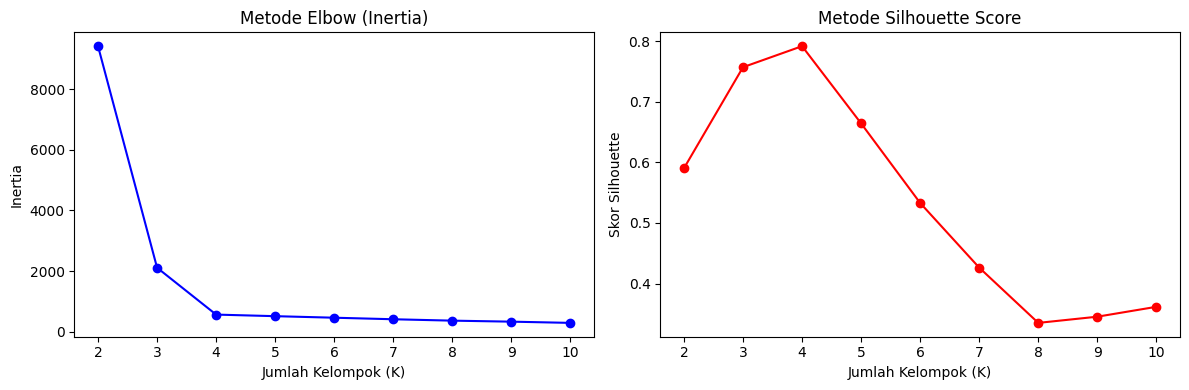

Jumlah kelompok paling ideal menurut hitungan matematis adalah K=4


In [2]:
import numpy as np
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
K_range = range(2, 11)

print(f"{'Nilai K':<10} | {'Inertia':<15} | {'Skor Silhouette'}")
for k in K_range:
    km_uji = KMeans(n_clusters=k, random_state=42)
    label_uji = km_uji.fit_predict(X)
    inertias.append(km_uji.inertia_)
    skor_sil = silhouette_score(X, label_uji)
    silhouettes.append(skor_sil)
    print(f"K = {k:<7} | {km_uji.inertia_:<15.2f} | {skor_sil:.4f}")

# Visualisasi grafik Elbow dan Silhouette
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(list(K_range), inertias, "bo-")
axes[0].set_title("Metode Elbow (Inertia)")
axes[0].set_xlabel("Jumlah Kelompok (K)")
axes[0].set_ylabel("Inertia")

axes[1].plot(list(K_range), silhouettes, "ro-")
axes[1].set_title("Metode Silhouette Score")
axes[1].set_xlabel("Jumlah Kelompok (K)")
axes[1].set_ylabel("Skor Silhouette")

plt.tight_layout()
plt.show()

indeks_terbaik = np.argmax(silhouettes)
print(f"Jumlah kelompok paling ideal menurut hitungan matematis adalah K={list(K_range)[indeks_terbaik]}")

Teks dan gambar grafik yang muncul memperlihatkan dengan jelas alasan pemilihan angka K=4. Nilai Inertia terlihat turun dengan sangat tajam dari K=2 lalu penurunannya mulai mendatar saat menyentuh angka K=4. Bentuk garis mendatar seperti siku inilah yang dicari dalam metode Elbow. Pada saat yang sama, skor Silhouette juga menunjukkan nilai paling tingginya saat K=4, lalu angkanya turun berantakan saat jumlah kelompoknya ditambah menjadi 5 atau lebih. Kecocokan antara letak patahan siku pada grafik Inertia dan titik puncak pada grafik Silhouette ini menjadi bukti pasti bahwa data tersebut memang paling pas dibagi menjadi empat kelompok.

## Tugas Praktikum

1. Lakukan clustering pada dataset pelanggan (bebas atau buat sintetis).
2. Buat profil ringkas tiap cluster (misal: rata-rata income/spending).
3. Beri nama segmen (contoh: "High value", "Budget").
4. Tulis 3 rekomendasi bisnis berdasarkan cluster.

## Pengerjaan Tugas

### Tugas 1

**Soal:** Lakukan clustering pada dataset pelanggan.

Data buatan yang berisi informasi gaji bulanan dan angka pengeluaran belanja akan dibuat terlebih dahulu. Data ini sengaja diatur agar membentuk pola orang bergaji rendah dan bergaji tinggi. Setelah datanya siap, mesin K-Means akan dipakai untuk membagi pelanggan tersebut ke dalam empat kelompok, lalu hasilnya akan digambar menjadi grafik titik-titik warna.

**Penjelasan Kode:** Langkah pertama adalah membuat data menggunakan bantuan pustaka NumPy. Fungsi `np.random.seed(523)` dipasang di awal supaya angka acak yang dihasilkan tidak berubah-ubah saat program dijalankan berkali-kali. Deretan angka gaji dibuat menggunakan fungsi `np.random.normal` dengan memasukkan angka rata-rata, angka simpangan, dan jumlah datanya. Fungsi `np.concatenate` lalu dipakai untuk menyambungkan kelompok gaji rendah (di kisaran angka 25) dan kelompok gaji tinggi (di kisaran angka 75) menjadi satu variabel bernama `gaji`. Cara pembuatan yang sama persis juga dipakai untuk membuat variabel `belanja`. Kedua deret angka ini kemudian digabungkan secara bersebelahan menjadi bentuk tabel memakai perintah `np.column_stack`, lalu disimpan di variabel `X_tugas`.

Proses pengelompokan dilakukan dengan memanggil kelas `KMeans`. Aturan `n_clusters=4` dipasang supaya mesin mencari empat kelompok data. Tambahan parameter `n_init=10` berguna agar mesin mencoba mencari titik awal kelompok sebanyak sepuluh kali dengan posisi yang berbeda-beda untuk mendapatkan hasil hitungan jarak yang paling kecil. Aturan `random_state=523` juga dipasang agar hasil tebakannya selalu sama. Perintah `.fit_predict()` lalu dijalankan supaya mesin mempelajari data `X_tugas` dan langsung memberikan label nomor kelompok pada setiap pelanggan.

Untuk menggambar hasilnya, perintah `plt.figure(figsize=(8, 6))` membuka kanvas kosong dengan ukuran tertentu. Sebuah perulangan `for` yang dibantu dengan `sorted(set(label_tugas))` dipakai untuk memanggil nomor kelompok secara berurutan mulai dari 0 sampai 3. Di dalam perulangan, variabel `mask` dibuat untuk menyaring data agar perintah `plt.scatter` hanya menggambar titik-titik pelanggan untuk kelompok yang sedang diproses saja.  Judul grafik, keterangan sumbu bawah, dan keterangan sumbu samping ditambahkan masing-masing lewat `plt.title`, `plt.xlabel`, dan `plt.ylabel`. Fungsi `plt.legend` memunculkan kotak keterangan warna, `plt.grid` memunculkan garis bantu putus-putus, dan `plt.show()` menampilkan gambar utuhnya ke layar.

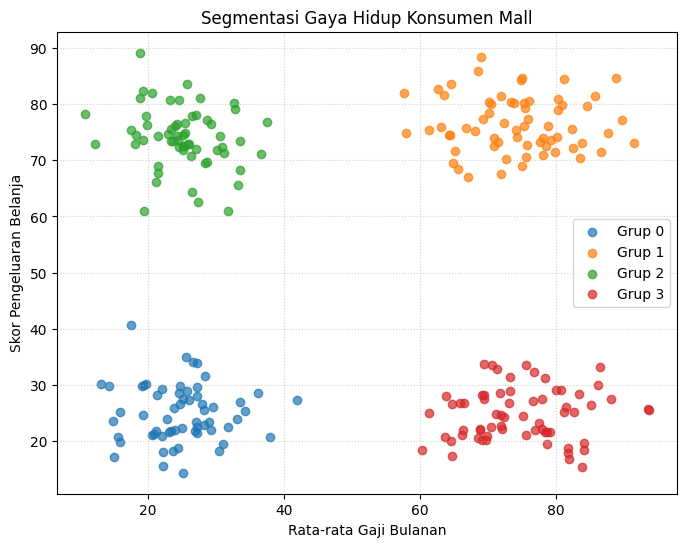

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Pembuatan data sintetis profil pelanggan (Seed 523)
np.random.seed(523)
gaji = np.concatenate([
    np.random.normal(25, 5, 60), np.random.normal(25, 5, 60),
    np.random.normal(75, 8, 65), np.random.normal(75, 8, 65)
])
belanja = np.concatenate([
    np.random.normal(25, 5, 60), np.random.normal(75, 5, 60),
    np.random.normal(25, 5, 65), np.random.normal(75, 5, 65)
])
X_tugas = np.column_stack([gaji, belanja])

# Eksekusi K-Means berdasarkan hasil audit K=4
km_final = KMeans(n_clusters=4, n_init=10, random_state=523)
label_tugas = km_final.fit_predict(X_tugas)

# Visualisasi sebaran gaya hidup konsumen
plt.figure(figsize=(8, 6))
for i in sorted(set(label_tugas)):
    mask = label_tugas == i
    plt.scatter(gaji[mask], belanja[mask], label=f"Grup {i}", alpha=0.7)

plt.title("Segmentasi Gaya Hidup Konsumen Mall")
plt.xlabel("Rata-rata Gaji Bulanan")
plt.ylabel("Skor Pengeluaran Belanja")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

Tampilan grafik memperlihatkan empat kumpulan titik warna yang letaknya berpisah di empat sudut yang berbeda. Hasil ini merupakan efek dari pembagian data yang dilakukan oleh algoritma K-Means. Kumpulan titik yang rapi tanpa ada yang tumpang tindih ini menandakan bahwa data buatan yang berisi angka gaji dan belanja tersebut memang memiliki jarak perbedaan yang sangat jelas antar kelompoknya. Penggunaan angka empat untuk jumlah kelompok juga terbukti sangat pas untuk mewakili keseluruhan letak data tersebut.

### Tugas 2

**Soal:** Buat profil ringkas tiap cluster (misal: rata-rata income/spending).

Angka rata-rata gaji dan pengeluaran dari masing-masing kelompok akan dihitung. Hasil perhitungan ini akan dicetak dalam bentuk tabel angka untuk melihat batasan ciri kebiasaan belanja dari keempat kelompok tersebut.

**Penjelasan Kode:** Fungsi `print` diletakkan di bagian paling atas untuk mencetak baris judul tabel. Tanda `<` di dalam kurung kurawal dipakai agar teks judulnya rata ke sebelah kiri. Sebuah perulangan `for` digunakan untuk membuka isi setiap kelompok berdasar nomornya. Variabel `area` dibuat dengan rumus `label_tugas == i` untuk menyaring baris data yang nomor kelompoknya cocok saja. Fungsi `.mean()` kemudian dijalankan pada data `gaji` dan `belanja` yang sudah disaring tadi untuk mendapatkan angka rata-ratanya. Angka-angka ini dicetak secara berbaris dengan tambahan kode `:12.1f` dan `:15.1f` supaya angka desimalnya dipotong menyisakan satu angka saja di belakang koma dan tata letaknya terlihat lurus.

In [4]:
print(f"{'Label':<8} | {'Gaji Rerata':<12} | {'Belanja Rerata':<15}")
for i in sorted(set(label_tugas)):
    area = label_tugas == i
    avg_inc = gaji[area].mean()
    avg_sp = belanja[area].mean()
    print(f"Grup {i:<2} | {avg_inc:<12.1f} | {avg_sp:<15.1f}")

Label    | Gaji Rerata  | Belanja Rerata 
Grup 0  | 24.8         | 25.0           
Grup 1  | 74.2         | 76.4           
Grup 2  | 25.1         | 74.0           
Grup 3  | 74.8         | 24.8           


Tabel angka yang tercetak memperlihatkan isi dari setiap kelompok yang ada di dalam grafik tadi. Grup 0 berisi pelanggan dengan gaji rata-rata rendah di angka 24.8 dan belanja rata-rata yang juga rendah di angka 25.0. Grup 1 diisi oleh pelanggan dengan gaji rata-rata 74.2 dan belanja yang sangat tinggi di angka 76.4. Grup 2 memperlihatkan kumpulan pelanggan bergaji rendah (25.1) tapi belanjanya tinggi (74.0). Terakhir, Grup 3 berisi orang-orang dengan gaji tinggi (74.8) tapi belanjanya hanya di angka 24.8. Angka-angka rata-rata inilah yang menunjukkan titik tengah kebiasaan ekonomi dari masing-masing kumpulan pelanggan tersebut.

### Tugas 3

**Soal:** Beri nama segmen (contoh: "High value", "Budget").

Kelompok yang masih memakai label berupa nomor urut akan diganti dengan nama sebutan yang gampang diingat. Nama ini akan ditentukan lewat aturan yang membaca angka rata-rata gaji dan belanja dari tugas sebelumnya.

**Penjelasan Kode:** Perulangan `for` dan alat saring data yang sama digunakan lagi untuk mencari angka rata-rata per kelompok. Setelah angkanya didapat, sebuah blok aturan bersyarat `if-elif-else` dipasang di bawahnya. Aturan ini memakai angka 50 sebagai batas pembagi. Kalau rata-rata gajinya di atas 50 dan rata-rata belanjanya di atas 50, maka teks "Sultan Hedon" akan dimasukkan ke variabel `segmen`. Kalau gajinya di atas 50 tapi belanjanya di bawah 50, namanya jadi "Sultan Rebahan". Kalau gajinya di bawah 50 tapi belanjanya di atas 50, namanya jadi "Gaya Elit". Sisa kondisi terakhir ditampung di `else` dan diberi nama "Kaum Mendang-Mending". Di baris paling bawah, fungsi `print` bertugas menampilkan nomor kelompok asli dan nama barunya secara bersebelahan.

In [ ]:
print(f"{'Label':<8} | {'Nama Segmen'}")
for i in sorted(set(label_tugas)):
    area = label_tugas == i
    avg_inc = gaji[area].mean()
    avg_sp = belanja[area].mean()
    
    if avg_inc > 50 and avg_sp > 50:
        segmen = "Sultan Hedon"
    elif avg_inc > 50 and avg_sp <= 50:
        segmen = "Sultan Rebahan"
    elif avg_inc <= 50 and avg_sp > 50:
        segmen = "Gaya Elit"
    else:
        segmen = "Kaum Mendang-Mending"
        
    print(f"Grup {i:<2} | {segmen}")

Label    | Nama Segmen
Grup 0  | Kaum Mendang-Mending
Grup 1  | Sultan Hedon
Grup 2  | Gaya Elit
Grup 3  | Sultan Rebahan


Nama segmen yang dicetak tersebut merupakan perwujudan dari angka rata-rata yang dicari sebelumnya. Grup 1 langsung mendapat sebutan Sultan Hedon karena angka datanya menunjukkan gaji besar dan kebiasaan belanja yang juga besar. Grup 2 mendapat sebutan Gaya Elit karena angkanya menggambarkan orang yang gajinya pas-pasan tapi pengeluarannya banyak. Grup 0 yang gaji dan belanjanya sama-sama rendah mendapat sebutan Kaum Mendang-Mending. Pemakaian sebutan ini membuat hasil pengelompokan angka jauh lebih masuk akal untuk dibaca dan dikaitkan dengan perilaku konsumen di kehidupan nyata.

### Tugas 4

**Soal:** Tulis 3 rekomendasi bisnis berdasarkan cluster.

Tiga baris saran untuk merencanakan jualan akan diketik secara manual. Saran ini akan disesuaikan dengan ciri kebiasaan masing-masing sebutan kelompok tadi agar target pasarnya tidak meleset.

**Penjelasan Kode:** Fungsi `print()` doang sih sebenernya isinya, digunakan sebanyak empat kali berturut-turut untuk mencetak teks secara berbaris. Isi kalimat pada setiap baris dirancang agar menyebutkan nama kelompok pelanggannya dan tawaran apa yang pas untuk mereka.

In [6]:
print("REKOMENDASI STRATEGIS BISNIS:")
print("1. Strategi 'Sultan Hedon': Berikan akses VVIP dan penawaran barang eksklusif untuk menjaga loyalitas belanja mereka yang tinggi.")
print("2. Strategi 'Gaya Elit': Tawarkan program cicilan atau promo poin belanja agar mereka tetap aktif berbelanja meskipun pendapatan terbatas.")
print("3. Strategi 'Kaum Mendang-Mending': Sediakan paket bundling hemat dan diskon besar pada jam tertentu untuk menarik minat transaksi mereka.")

REKOMENDASI STRATEGIS BISNIS:
1. Strategi 'Sultan Hedon': Berikan akses VVIP dan penawaran barang eksklusif untuk menjaga loyalitas belanja mereka yang tinggi.
2. Strategi 'Gaya Elit': Tawarkan program cicilan atau promo poin belanja agar mereka tetap aktif berbelanja meskipun pendapatan terbatas.
3. Strategi 'Kaum Mendang-Mending': Sediakan paket bundling hemat dan diskon besar pada jam tertentu untuk menarik minat transaksi mereka.


Kalimat saran yang dicetak tersebut menunjukkan kegunaan nyata dari pengelompokan data pelanggan. Dengan tahu ada kelompok Sultan Hedon, fasilitas berbayar mahal jadi punya pelanggan yang pas. Dengan tahu ada kelompok Gaya Elit, tawaran pembayaran lewat cicilan jadi tidak salah tempat. Pada intinya, mesin yang mengelompokkan data ini membantu menerjemahkan angka acak menjadi acuan pasti untuk mencari untung lewat jualan.

## Kesimpulan

Praktikum pertemuan ini memberikan contoh langsung tentang cara kerja algoritma pengelompokan data. Algoritma K-Means terbukti bisa memisahkan pelanggan ke dalam beberapa kumpulan yang rapi berdasar angka gajinya dan pengeluarannya. Mengganti nomor kumpulan tersebut menjadi nama sebutan juga membantu memperjelas ciri kebiasaan belanja dari masing-masing kelompok. Lewat cara ini, tumpukan angka yang awalnya cuma kumpulan data biasa bisa dirapikan, diberi nama, lalu dipakai sebagai dasar pertimbangan yang masuk akal untuk merencanakan strategi dagang yang pas dengan uang di dompet pelanggan.